In [157]:
import os
import pandas as pd
import numpy as np
import datetime
from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use('dark_background')

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import chart_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# CoinMetrics

In [158]:
try:
    os.remove("btc.csv")
except FileNotFoundError:
    pass
!wget https://coinmetrics.io/newdata/btc.csv

--2020-10-31 08:10:05--  https://coinmetrics.io/newdata/btc.csv
Resolving coinmetrics.io (coinmetrics.io)... 104.26.14.66, 172.67.75.174, 104.26.15.66
Connecting to coinmetrics.io (coinmetrics.io)|104.26.14.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2714162 (2.6M) [application/octet-stream]
Saving to: ‘btc.csv’

btc.csv             100%[===================>]   2.59M  12.0MB/s    in 0.2s    

2020-10-31 08:10:05 (12.0 MB/s) - ‘btc.csv’ saved [2714162/2714162]



In [159]:
cm = pd.read_csv('btc.csv')
cm['BlockSpacePrice'] = cm['FeeTotNtv'] * 10 ** 8 / cm['BlkSizeByte']
cm['BlockSpacePriceUSD'] = cm['FeeTotUSD'] * 100 / cm['BlkSizeByte']

In [160]:
cm.loc[cm['BlockSpacePriceUSD'] > 1]

,date,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,...,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d,BlockSpacePrice,BlockSpacePriceUSD
3077,2017-06-07,877184,165,163700196,9.921224e+05,3.455637,4.433209e+10,1.282892e+10,6.787601e+11,0.001962,...,7255.100780,0.030620,82.880991,2.085744e+06,5.645607e+09,0.038874,0.047277,0.037142,405.626029,1.097932
3147,2017-08-16,688962,130,126573265,9.736405e+05,3.229365,7.206269e+10,2.231482e+10,9.232331e+11,0.001265,...,15464.984277,0.020000,87.293571,2.350677e+06,1.025995e+10,0.046276,0.058146,0.054480,276.322245,1.206058
3152,2017-08-21,632318,115,112294936,9.764777e+05,2.808664,6.595608e+10,2.348308e+10,9.232331e+11,0.001255,...,13638.241316,0.023380,93.347597,2.028268e+06,8.098115e+09,0.046495,0.043101,0.053909,266.068380,1.062312
3153,2017-08-22,530992,89,88839456,9.981961e+05,2.842030,6.731033e+10,2.368389e+10,9.232331e+11,0.001725,...,11820.345907,0.021404,87.207499,1.512040e+06,6.160552e+09,0.046389,0.042492,0.053930,381.413362,1.554004
3154,2017-08-23,839588,159,156854292,9.865050e+05,2.864845,6.851771e+10,2.391673e+10,9.232331e+11,0.001716,...,10709.905318,0.015715,65.168733,2.033356e+06,8.432155e+09,0.046390,0.042435,0.053475,343.312467,1.423688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4314,2020-10-26,825846,110,147389311,1.339903e+06,2.019542,2.423499e+11,1.200024e+11,1.999734e+13,0.000462,...,11196.086793,0.009831,128.598678,5.971375e+05,7.810950e+09,0.026234,0.016721,0.023918,79.911519,1.045295
4315,2020-10-27,827512,99,128526936,1.298252e+06,2.103700,2.533797e+11,1.204448e+11,1.999734e+13,0.000767,...,11794.228871,0.010562,144.439379,6.215463e+05,8.499971e+09,0.026398,0.018060,0.024442,152.231288,2.081843
4316,2020-10-28,817505,100,129116672,1.291167e+06,2.040493,2.462511e+11,1.206822e+11,1.999734e+13,0.000873,...,12505.939356,0.010706,142.290514,6.760690e+05,8.985180e+09,0.026454,0.019168,0.024765,175.352087,2.330487
4317,2020-10-29,887772,108,140035742,1.296627e+06,2.063571,2.496860e+11,1.209970e+11,1.999734e+13,0.000940,...,10470.822199,0.009766,131.605306,6.082288e+05,8.196015e+09,0.026454,0.019197,0.024727,186.528191,2.513508


In [161]:
block_space_daily = pd.read_csv("../stack-stats/data/04_block_space_daily.csv")

# Calculate daily mean fee rate
block_space_daily['fees_sats_per_vbyte'] = block_space_daily['sum_fees_sats'] / block_space_daily['sum_block_vbytes']
block_space_daily['fees_usd_per_vbyte'] = block_space_daily['sum_fees_usd'] / block_space_daily['sum_block_vbytes']
block_space_daily['daily_block_equivalents'] = block_space_daily['sum_block_vbytes'] / 1000000

# Let's only look at data > 2018, as this is when SegWit usage hits critical mass
block_space_daily_recent = block_space_daily.loc[(block_space_daily['date'] >= '2020-10-01') & (block_space_daily['date'] < '2020-10-30')]

In [162]:
block_space_daily_recent

,date,sum_fees_sats,sum_fees_usd,sum_block_vbytes,fees_sats_per_vbyte,fees_usd_per_vbyte,daily_block_equivalents
4029,2020-10-01,10203192869,1.082214e+06,123860581,82.376433,0.008737,123.860581
4030,2020-10-02,12251219145,1.294967e+06,134857826,90.845444,0.009602,134.857826
4031,2020-10-03,7190619458,7.590206e+05,150829256,47.673904,0.005032,150.829256
4032,2020-10-04,5583182413,5.954809e+05,140059211,39.863015,0.004252,140.059211
4033,2020-10-05,9828262979,1.058763e+06,124182732,79.143556,0.008526,124.182732
4034,2020-10-06,11331139880,1.200690e+06,129849919,87.263357,0.009247,129.849919
4035,2020-10-07,11117330476,1.185907e+06,149844572,74.192414,0.007914,149.844572
4036,2020-10-08,10313964018,1.124483e+06,147313218,70.013840,0.007633,147.313218
4037,2020-10-09,11078393286,1.226833e+06,141843629,78.102861,0.008649,141.843629
4038,2020-10-10,7584989665,8.573203e+05,141830336,53.479318,0.006045,141.830336


In [163]:
data_fitler = block_space_daily_recent.loc[block_space_daily_recent['fees_usd_per_vbyte'] > 0.005].copy()

In [164]:
data_fitler.sum_block_vbytes.min()

98900911

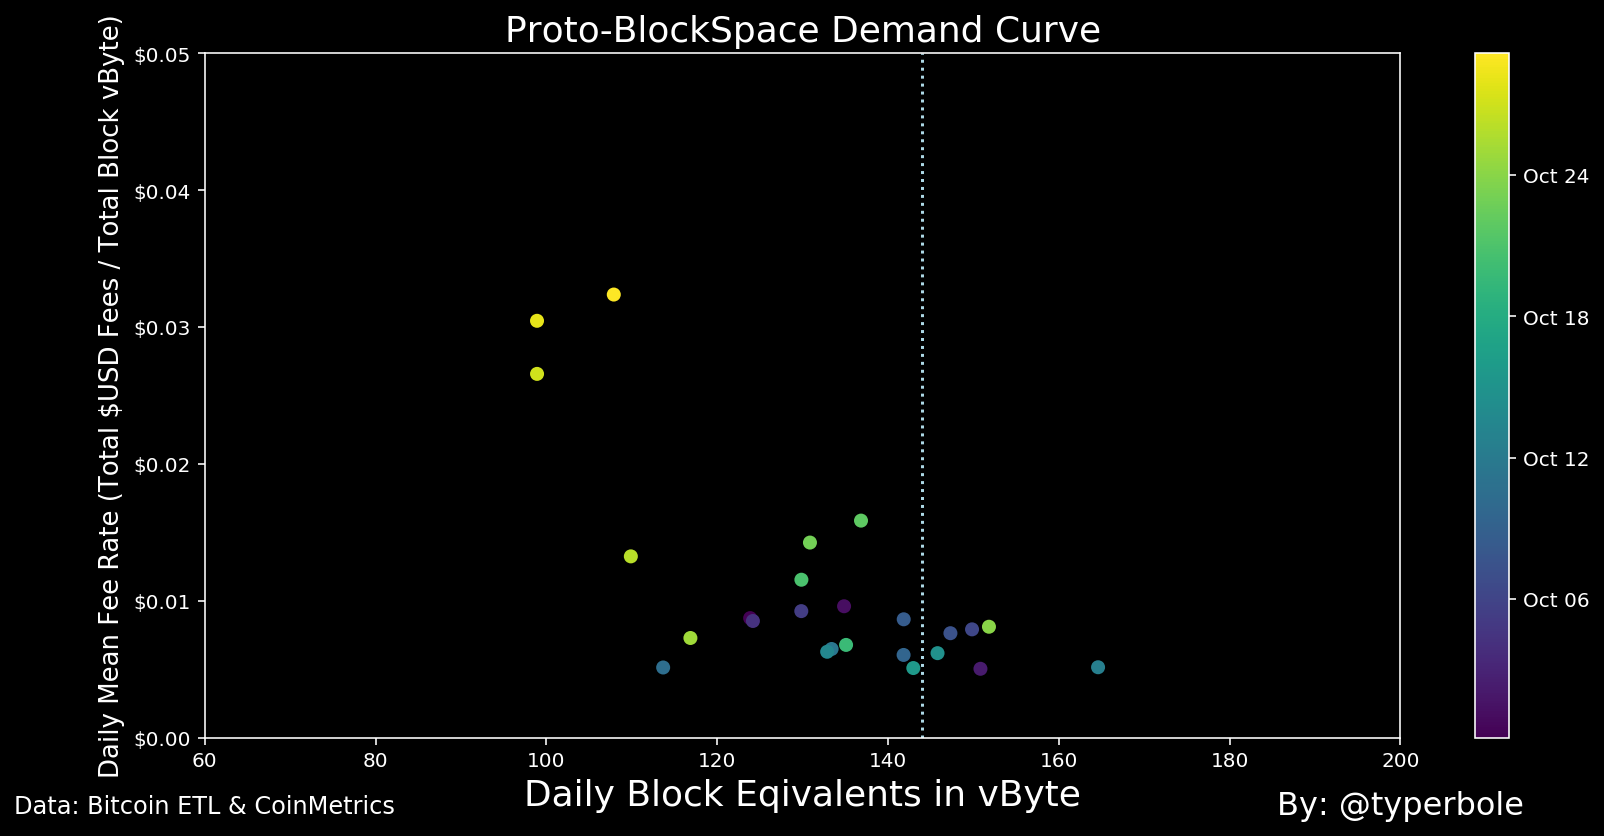

In [166]:
fig = plt.figure(
        figsize=[12, 6],
        clear=True,
        tight_layout=True
)

ax = plt.scatter(
    data_fitler['daily_block_equivalents'], data_fitler['fees_usd_per_vbyte'],
    c=pd.to_datetime(data_fitler['date'])).axes

ax.set_ylim(0, 0.05)
ax.set_yticklabels(['${:.2f}'.format(x) for x in ax.get_yticks()])
ax.set_ylabel('Daily Mean Fee Rate (Total $USD Fees / Total Block vByte)', fontsize=13)

ax.set_xlim(60, 200)
ax.set_xlabel('Daily Block Eqivalents in vByte', fontsize=18)

ax.set_title('Proto-BlockSpace Demand Curve', fontsize=18)

ax.text(
    1, -0.1,
    "By: @typerbole",
    transform=ax.transAxes,
    horizontalalignment='center',
    verticalalignment='center', fontsize=16
)

ax.text(
    0, -0.1,
    "Data: Bitcoin ETL & CoinMetrics",
    transform=ax.transAxes,
    horizontalalignment='center',
    verticalalignment='center', fontsize=12
)

plt.axvline(x=144, linestyle='dotted', color='lightblue')
cbar = plt.colorbar()
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%b %d'))
plt.show()

In [143]:
cm['BlkCnt']

0         0
1         0
2         0
3         0
4         0
       ... 
4313    117
4314    110
4315     99
4316    100
4317    108
Name: BlkCnt, Length: 4318, dtype: int64